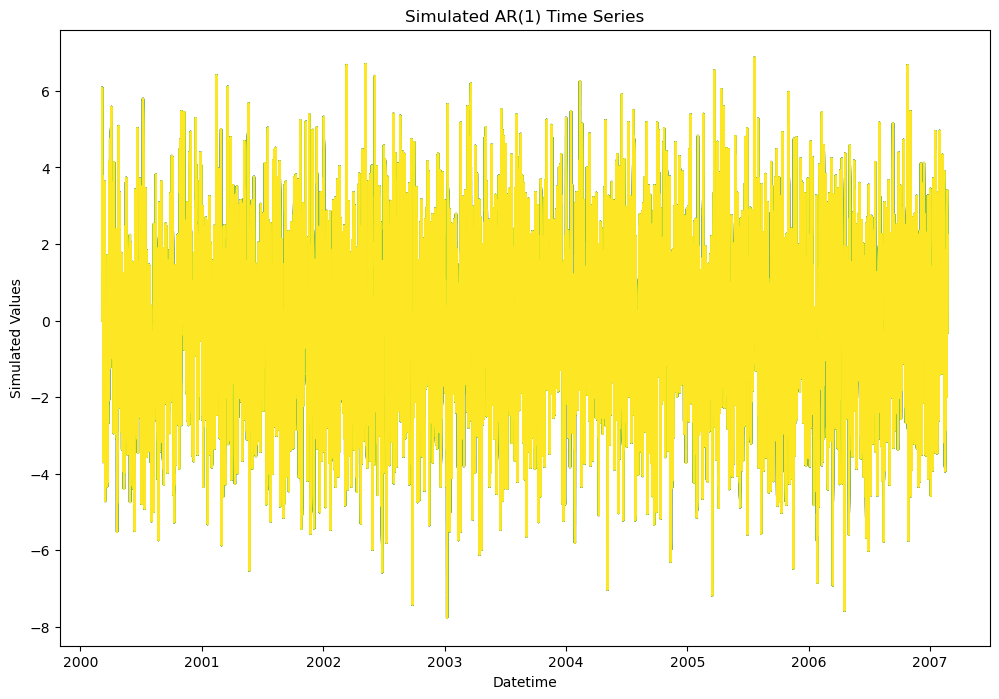

Simulation 20:
True Phi: 0.7, True Sigma: 1.5
Estimated Phi: 0.6975221736154729, Estimated Sigma: 1.4810852756271755




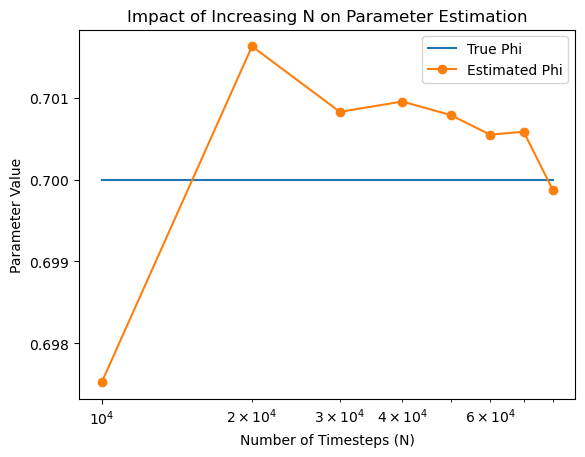

In [2]:
# -*- coding: utf-8 -*-
# @Time : 2024/1/21 21:13
# @Author : cyw
# @File : test1.py
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Define a function to simulate the AR(1) process
def simulate_ar1(phi, sigma, N):
    np.random.seed(0)
    errors = np.random.normal(0, sigma, N)
    X = np.zeros(N)
    for t in range(1, N):
        X[t] = phi * X[t - 1] + errors[t]
    return X


# question 1.1
# Load parameters from the .json file
with open('parameters.json', 'r') as file:
    params = json.load(file)

# Unpack the parameters
phi = params['phi']
sigma = params['sigma']
N = params['N']

# Define custom business day frequency
business_day = pd.tseries.offsets.CustomBusinessHour(start="09:30", end="15:00")

# Simulate the AR(1) process
start_date = pd.Timestamp("2000-03-06 09:30:00")
dates = pd.date_range(start=start_date, periods=N, freq=business_day)
X = simulate_ar1(phi, sigma, N)

# Create a pandas DataFrame with timestamps as the index
df1 = pd.DataFrame(X, index=dates, columns=['Simulated_Time_Series'])
# df.to_csv('simulated_time_series.csv')

# question 1.2
num_simulations = 20
# Initialize a 2D array to store the simulations
X = np.zeros((num_simulations, N))

# Simulate the AR(1) process for each simulation
for i in range(num_simulations):
    X[i, :] = simulate_ar1(phi, sigma, N)

# Create a pandas DataFrame for each simulation
dfs = [pd.DataFrame(X[i], index=dates, columns=[f'Simulation_{i + 1}_Time_Series']) for i in range(num_simulations)]

# 创建一个颜色列表
colors = plt.cm.viridis(np.linspace(0, 1, len(dfs)))

# 设置图形大小
plt.figure(figsize=(12, 8))

# 对每个数据框绘制时间序列
for df, color in zip(dfs, colors):
    plt.plot(df.index, df.values, color=color)

# 设置图表的标题和轴标签
plt.xlabel('Datetime')
plt.ylabel('Simulated Values')
plt.title('Simulated AR(1) Time Series')
plt.show()
# # Plot the time series
# plt.figure(figsize=(12, 8))
# for df in dfs:
#     plt.plot(df.index, df.values)
#
# plt.xlabel('Datetime')
# plt.ylabel('Simulated Values')
# plt.title('Simulated AR(1) Time Series')
# plt.savefig(f'Simulated AR(1) Time Series.png')
# plt.show()

# question 1.3
# Estimate ARIMA parameters for each simulation
model = sm.tsa.ARIMA(df1, order=(1, 0, 0))  # Assuming AR(1) process
results = model.fit()

# True parameters from the .json file
true_phi = phi
true_sigma = sigma

# Estimated parameters
estimated_phi = results.arparams[0]
estimated_sigma = np.sqrt(np.var(results.resid))  # Calculating the variance from the residuals

# Print true and estimated parameters for each simulation
print(f"Simulation {i + 1}:")
print(f"True Phi: {true_phi}, True Sigma: {true_sigma}")
print(f"Estimated Phi: {estimated_phi}, Estimated Sigma: {estimated_sigma}")
print("\n")

# List of N values to test
N_values = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
estimated_phis = []
for N in N_values:
    simulated_data = simulate_ar1(true_phi, true_sigma, N)

    # Estimate AR(1) parameters
    model = sm.tsa.ARIMA(simulated_data, order=(1, 0, 0))
    fitted_model = model.fit()
    estimated_phi = fitted_model.arparams[0]
    estimated_phis.append(estimated_phi)

# Compare estimated parameters with the true parameter value
plt.plot(N_values, [true_phi] * len(N_values), label='True Phi')
plt.plot(N_values, estimated_phis, marker='o', linestyle='-', label='Estimated Phi')
plt.xscale('log')  # Log scale for x-axis
plt.xlabel('Number of Timesteps (N)')
plt.ylabel('Parameter Value')
plt.title('Impact of Increasing N on Parameter Estimation')
plt.legend()
plt.show()

When the timestep N increases for an AR(1) model, several things can happen:

1. **Improved Parameter Estimation:** As N increases, the accuracy of parameter estimation typically improves. This means that the estimated coefficient for the autoregressive term (in this case, for AR(1)) tends to converge to the true parameter value more closely with a larger N.

2. **Reduced Variability:** With a larger N, the variability or uncertainty in the estimated parameters tends to decrease. This is often reflected in narrower confidence intervals around the estimated parameter values.

3. **More Accurate Forecasts:** Larger N allows for more historical data to be used in modeling the time series, potentially leading to more accurate forecasts and better capturing the underlying dynamics of the process.

4. **Computational Complexity:** As N increases, the computational complexity of estimating the parameters may also increase, particularly if using certain estimation techniques that are sensitive to sample size.

To demonstrate these effects empirically, one could perform simulations with varying N, estimate the AR(1) parameters for each simulation, and then compare the estimated parameters with the true parameter values. This comparison would provide empirical evidence of how parameter estimation and variability change as N increases.

You can see the results of the last image, as N becomes larger the estimate phi is also closer to the true value.